In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from scipy import stats

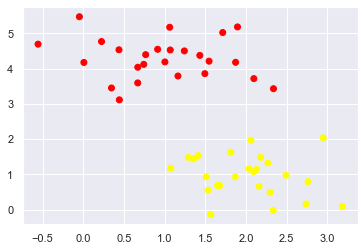

In [2]:
# dataset test
from sklearn.datasets import make_blobs
X, y =make_blobs(n_samples=50, centers = 2,random_state = 0, cluster_std = 0.60)
plt.scatter(X[:,0],X[:,1],c=y,cmap='autumn')

# Possible seprators

(0.0, 3.5)

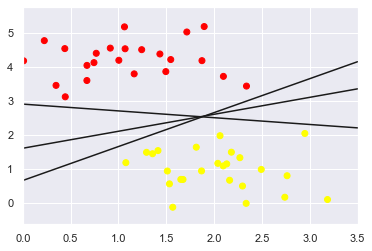

In [3]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,cmap='autumn')

for m , b in [(1,0.65), (0.5,1.6), (-0.2,2.9)]:
    yfit = m*xfit + b
    plt.plot(xfit, yfit,'-k')
plt.xlim(1-1,3.5)

# Margins

(0.0, 3.5)

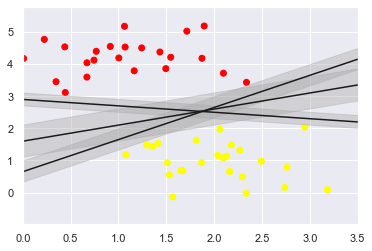

In [4]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,cmap='autumn')

for m , b , d in [(1,0.65,0.33), (0.5,1.6,0.5), (-0.2,2.9,0.2)]:
    yfit = m*xfit + b
    plt.plot(xfit, yfit,'-k')
    plt.fill_between(xfit,yfit-d, yfit+d, edgecolor='None', color='#AAAAAA',alpha=0.4)
plt.xlim(1-1,3.5)

# Training SVM

In [5]:
from sklearn.svm import SVC
model = SVC(kernel='linear',C=1).fit(X,y)



In [6]:
#plotting decision boundary with maximum margin

def plot_decision_boundaries(plot, ax=None, plot_support=True):
    
    if ax is None:
        ax = plt.gca()
    xlim= ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0], xlim[1],30)
    y= np.linspace(ylim[0],ylim[1],30)
    Y, X = np.meshgrid(y,x)
    xy= np.vstack([X.ravel(),Y.ravel()]).T
    P= model.decision_function(xy).reshape(X.shape)
    #plot db and margins
    ax.contour(X,Y,P, colors='k',levels=[-1,0,1], alpha = 0.5,linestyles=['--','-','--'])
    
    #plotting support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=300,linewidth=1,facecolor='None')
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

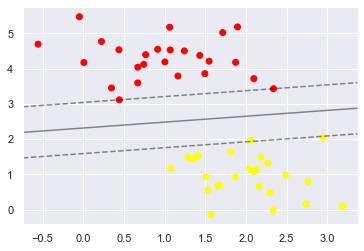

In [7]:
#plotting decision boundary for the model
plt.scatter(X[:,0],X[:,1],c=y,cmap='autumn')
plot_decision_boundaries(model)

# Face recognition model project

In [8]:
from  sklearn.datasets import fetch_lfw_people
faces= fetch_lfw_people(min_faces_per_person= 60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


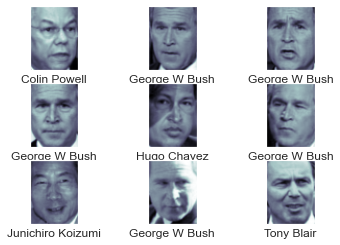

In [9]:
fig,ax = plt.subplots(3,3)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[],yticks=[], xlabel = faces.target_names[faces.target[i]])

In [79]:
# create pipeline for principal component analysis and support vector classifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline


pca= PCA(n_components=150, random_state=42,whiten=True)
svc = SVC(kernel='rbf',class_weight='balanced',random_state=42)

model1 = make_pipeline(pca, svc)


In [107]:
# splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target , random_state=42)
print(y_train)

[3 6 3 ... 3 7 1]


In [117]:
# find best model
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C':[1,5,7,10,50],
              'svc__gamma':[0.0001,0.0005,0.001,0.005,0.01]}

grid_search = GridSearchCV(model1, param_grid=param_grid)

%time grid_search.fit(X_train,y_train)
print (grid_search.best_params_)

Wall time: 1min 54s
{'svc__C': 7, 'svc__gamma': 0.001}


In [118]:
# predict
model = grid_search.best_estimator_
yfit = model.predict(X_test)

Text(0.5, 0.98, 'predicted names; incorrect labels in Red')

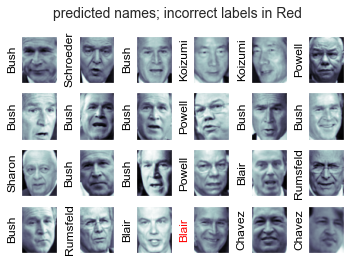

In [119]:
fig, ax = plt.subplots(4,6)

for i , axi in enumerate(ax.flat):
    
    axi.imshow(X_test[i].reshape(62,47), cmap='bone')
    axi.set(xticks=[],yticks=[]) 
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                       color='black' if yfit[i] == y_test[i] else 'red' )
    
fig.suptitle("predicted names; incorrect labels in Red",size =14)

# Evaluation

In [120]:
from sklearn.metrics import classification_report

print(classification_report(y_test, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.68      0.87      0.76        15
     Colin Powell       0.85      0.88      0.86        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.95      0.84      0.89       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.88      0.70      0.78        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.87      0.95      0.91        42

         accuracy                           0.86       337
        macro avg       0.82      0.86      0.84       337
     weighted avg       0.87      0.86      0.86       337



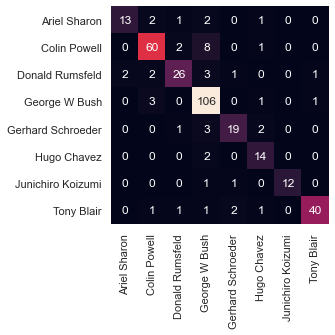

In [121]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix

mat=confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot= True, fmt='d', cbar=False,
           xticklabels=faces.target_names,
           yticklabels= faces.target_names)
